In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import fetch_openml
 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [5]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
 
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

c:\Users\linas\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [7]:
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]
 
X_test = X[6000:7000]
y_test = y[6000:7000]
 
# Standardizing the data (as you generally always should do when using SVM models).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  # Only transforming the validation data. 
X_test_scaled = scaler.transform(X_test)

In [8]:
print(X_train.shape)

(5000, 784)


In [9]:
#Träna en k-NN-modell
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
 
# Utvärdera på valideringsdata
knn_val_predictions = knn_clf.predict(X_val)
knn_val_accuracy = accuracy_score(y_val, knn_val_predictions)
print(f"k-NN Validation Accuracy: {knn_val_accuracy:.2f}")

k-NN Validation Accuracy: 0.94


In [10]:
# 5. Träna SVM-modeller och utvärdera på testdata
models = [
    SVC(kernel='linear'),
    SVC(kernel='rbf')
]
 
for model in models:
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Model {type(model).__name__} - Accuracy: {accuracy:.2f}")

Model SVC - Accuracy: 0.92
Model SVC - Accuracy: 0.91


In [11]:
from sklearn.model_selection import GridSearchCV
 
# 1. För k-NN-modellen
knn_param_grid = {
    'n_neighbors': [3, 5, 7],  # Testa olika antal grannar
    'weights': ['uniform', 'distance'],  # Testa olika viktningar
    'metric': ['euclidean', 'manhattan']  # Testa olika avståndsmått
}
 
knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)
 
print("Best parameters for k-NN:", knn_grid_search.best_params_)
print("Best k-NN cross-validation score:", knn_grid_search.best_score_)
 
# 2. För SVM-modellerna
svm_param_grid = {
    'C': [0.1, 1, 10],  # Testa olika C-värden
    'kernel': ['linear', 'rbf'],  # Testa olika kärnor
}
 
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid_search.fit(X_train_scaled, y_train)
 
print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best SVM cross-validation score:", svm_grid_search.best_score_)

Best parameters for k-NN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best k-NN cross-validation score: 0.9342
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best SVM cross-validation score: 0.9234


In [12]:

knn_clf = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance') 
# Träna modellen på hela träningsdatamängden 
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [13]:

svm_clf = SVC(C=10, kernel='rbf') 
# Träna modellen på hela träningsdatamängden
svm_clf.fit(X_train_scaled, y_train)

SVC(C=10)

In [14]:
# Träna k-NN-modellen
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
 
# Gör förutsägelser på testdatamängden
knn_predictions = knn_clf.predict(X_test)
 
# Utvärdera prestanda med accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f"Accuracy of k-NN model on test data: {accuracy}")

Accuracy of k-NN model on test data: 0.915


In [15]:
svm_clf = SVC(C=10, kernel='rbf') # Träna modellen på hela träningsdatamängden (observera att du behöver använda skala data för SVM-modeller)
svm_clf.fit(X_train_scaled, y_train) # Gör förutsägelser på testdatamängden
svm_predictions = svm_clf.predict(X_test_scaled) # Utvärdera prestanda med accuracy_score
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy of SVM model on test data: {accuracy}")

Accuracy of SVM model on test data: 0.921


In [16]:

 
# Ladda in MNIST-datasetet
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)
 
# Dela upp data i tränings- och testuppsättningar
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]
 
# Definiera de bästa hyperparametrarna för SVM-modellen
best_params = {'C': 10, 'kernel': 'rbf'}
 
# Skapa en SVM-modell med de bästa hyperparametrarna
svm_clf = SVC(C=best_params['C'], kernel=best_params['kernel'], random_state=42)
 
# Träna modellen på träningsdatamängden
svm_clf.fit(X_train, y_train)
 
# Gör förutsägelser på testdatamängden
svm_predictions = svm_clf.predict(X_test)
 
# Utvärdera prestanda med accuracy_score
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy of SVM model on test data: {accuracy}")

c:\Users\linas\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy of SVM model on test data: 0.9837


In [17]:
import joblib
 
# Spara modellen med en korrekt formatterad sökväg
joblib.dump(svm_clf, r"C:\Users\linas\OneDrive\Dokument\Machine Learning\kunskapskontroll_2\SVM_test_trained")

['C:\\Users\\linas\\OneDrive\\Dokument\\Machine Learning\\kunskapskontroll_2\\SVM_test_trained']

In [18]:
from PIL import Image

In [19]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [20]:
import cv2

3


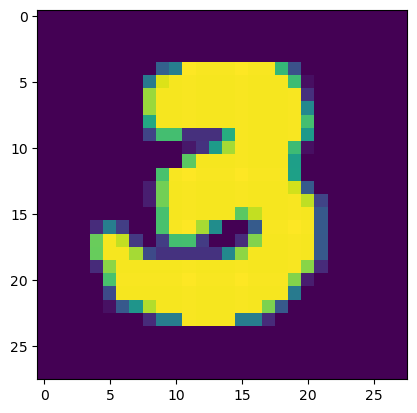

In [24]:
plt.imshow(X_test[200].reshape(28,28))
predicts = svm_clf.predict(X_test)
print (predicts[200])
plt.show()

Prediction for your image: [8]


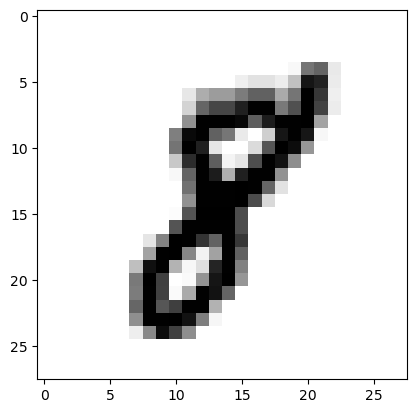

In [29]:
image1 = Image.open(r"C:\Users\linas\OneDrive\Dokument\Machine Learning\kunskapskontroll_2\image8.png")
# Konvertera bilden från PIL till OpenCV-format
image_test = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)

# Förbered bilden för modellen
gray_image = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)  # Konvertera till gråskala
resized_image = cv2.resize(gray_image, (28, 28))  # Omformatera till samma storlek som träningsbilder
flattened_image = resized_image.flatten().reshape(1, -1)

plt.imshow(resized_image, cmap=mpl.cm.binary)
 
# Gör en förutsägelse med modellen
prediction = svm_clf.predict(flattened_image)
 
# Visa resultatet
print(f"Prediction for your image: {prediction}")

Prediction for your image: [3]


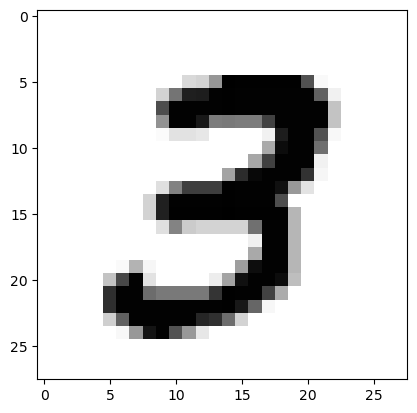

In [30]:
# Load and preprocess the image
image1 = Image.open(r"C:\Users\linas\OneDrive\Dokument\Machine Learning\kunskapskontroll_2\image3.png")
image_test = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)

gray_image = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (28, 28))
flattened_image = resized_image.flatten().reshape(1, -1)

plt.imshow(resized_image, cmap=mpl.cm.binary)

# Make a prediction with the model
prediction = svm_clf.predict(flattened_image)

# Display the result
print(f"Prediction for your image: {prediction}")


Prediction for your image: [7]


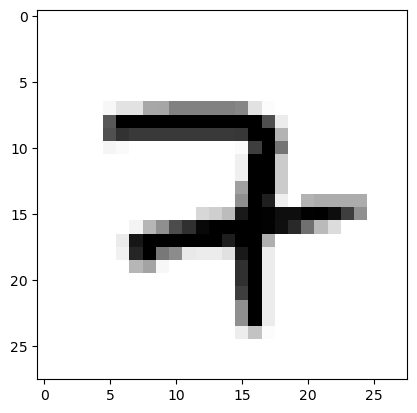

In [32]:
image1 = Image.open(r"C:\Users\linas\OneDrive\Dokument\Machine Learning\kunskapskontroll_2\image7.png")
image_test = cv2.cvtColor(np.array(image1), cv2.COLOR_RGB2BGR)

gray_image = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray_image, (28, 28))
flattened_image = resized_image.flatten().reshape(1, -1)

plt.imshow(resized_image, cmap=mpl.cm.binary)

# Make a prediction with the model
prediction = svm_clf.predict(flattened_image)

# Display the result
print(f"Prediction for your image: {prediction}")